# 02. Neural network classification with PyTorch

The knowledge for this kind of classification, include probalistic relating term will not be disscussed in here. This only another section to build up the momentum and get familiar with PyTorch. 

## 1. Data for classification problem

In [1]:
from sklearn.datasets import make_circles

# create 1000 samples 
n_samples = 1000 

X, y = make_circles(n_samples=n_samples, 
					noise=0.03, 
					random_state=42)

print(f"Some first 5 samples of data X: {X[:5]}")
print(f"Some first 5 samples of data y: {y[:5]}")

Some first 5 samples of data X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Some first 5 samples of data y: [1 1 1 1 0]


In [3]:
# Make a data frame with pandas
import pandas as pd 
circle = pd.DataFrame({"X1": X[:, 0], 
					   "X2": X[:, 1],
					   "label": y})
circle.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


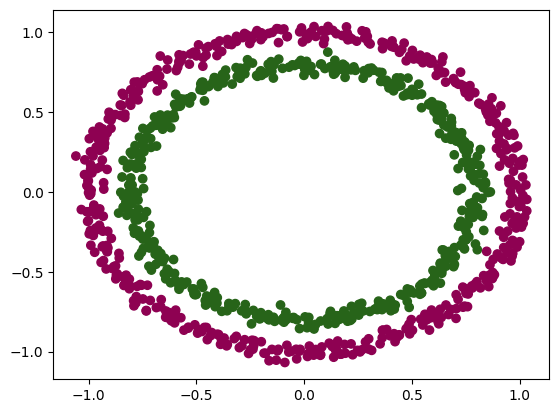

In [4]:
# Visulize this things up cause I followed the codecamp.org and I don't know what going on in the data too :)) 

import matplotlib.pyplot as plt 
plt.scatter(x = X[:, 0],
			y = X[:, 1],
			c= y, 
			cmap=plt.cm.PiYG)

__Note:__ So the idea is that, we use the sklearn kit to create a bunch of points that either belong to circle 1 or circle 0. And the classification task is to determine wether a newly introduced point belong to circle 1 or 0. 

### 1.1 Determine the input and output shape of the data


In [5]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} adn the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} adn the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] adn the same for y: 1
Shapes for one sample of X: (2,) adn the same for y: ()


### 1.2 Turn the data into tensor then create train and test split

In [6]:
# Turn data into tensor 
import torch
print(f"Currently using torch version of: {torch.__version__}")

device = "cuda" if torch.cuda.is_available() else "cpu"

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

print(X)


Currently using torch version of: 2.5.1+cu124
tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])


In [7]:
# split data in to training and test set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [9]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.unsqueeze(dim=1).to(device)
y_test = y_test.unsqueeze(dim=1).to(device)

## 2. Building a model 

Now we will build a model to classify what dot belong to what circle. 

In [10]:
import torch 
from torch import nn 

# Make device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"


In [11]:
X_train.shape

torch.Size([800, 2])

In [12]:
# Create a model 
class CircleClassification(nn.Module):
	def __init__(self):
		super().__init__()
		# Create two nn.Linear() layer capable of handle the shape of input data
		self.layer1 = nn.Linear(in_features=2, out_features=5) # Take in 2 input and upscales to 5 features 
		self.layer2 = nn.Linear(in_features=5, out_features=1) # Take in 5 features and out put a classification result

	def forward(self, input: torch.tensor):
		return self.layer2(self.layer1(input)) # x -> layer1 -> layer2
	
# Create an instance of a model and send it to the target device 
model = CircleClassification().to(device)


### 2.1 What actually implemented in the code is just the basic of the most basic term of NN. 
The network only contain one hidden layer: 
* Since the input shape is 2 for (x, y) coordinate, the number of weights of the first layer is 2 * 5 and bias is 5
* The output shape is 1, so the number of weight of the second layers is 5 and bias is 1. 
* This visual is get from tensorflow.playground.org
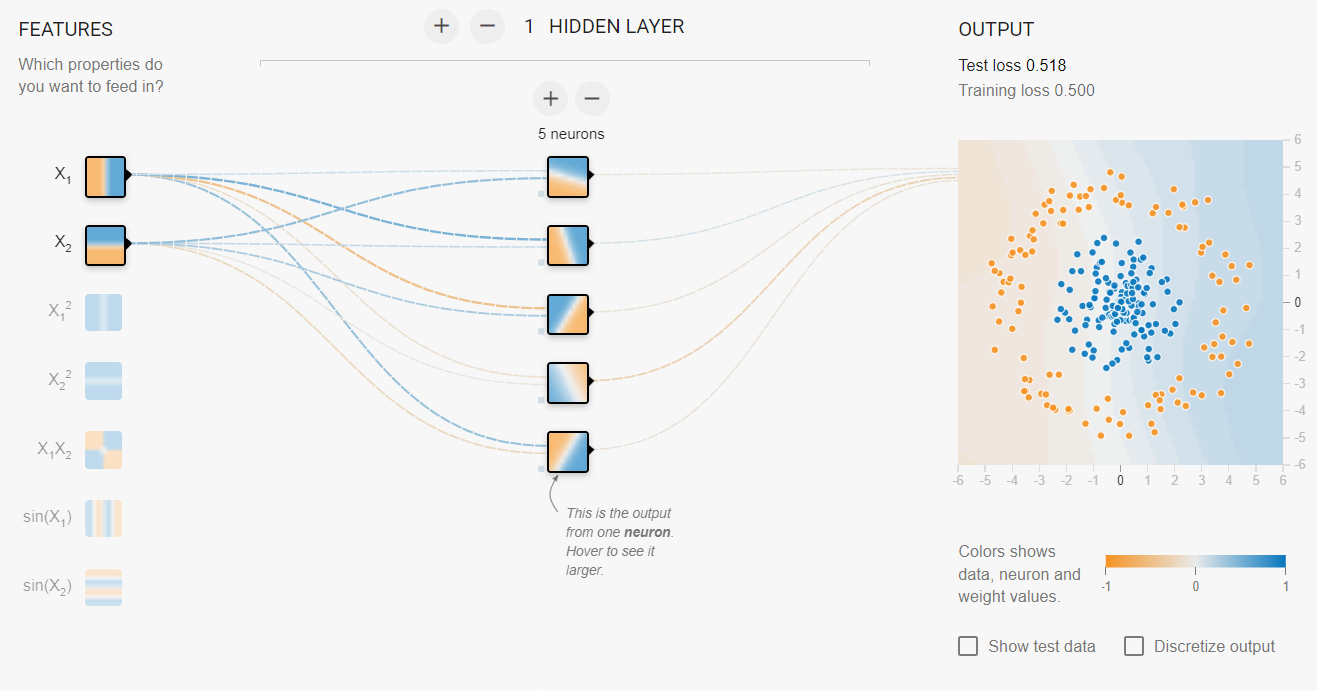

In [13]:
# Let's replicate the code above using a more compact way: nn.Sequential()
model_v2 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
						 nn.Linear(in_features=5, out_features=1)
						 ).to(device)

print(model_v2)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)


In [14]:
# Make some predictions with the model 
model.eval()
with torch.inference_mode():
	pred = model(X_test.to(device))
	print(f"The first 10 predictions: {pred[:10]}")
	print(f"The first 10 labels: {y_test[:10]}")

The first 10 predictions: tensor([[-0.1475],
        [-0.2638],
        [ 0.1865],
        [-0.2423],
        [ 0.2328],
        [ 0.1615],
        [-0.2027],
        [-0.1030],
        [ 0.1840],
        [-0.2711]], device='cuda:0')
The first 10 labels: tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')


### 2.2 Setup loss function and optimizer

Which loss function and optimizer to be used here will be assumed known, we don't repeat that. 

Again, this is problem specific. 

* For classification problem the output must be a probalistic go from 0 to 1 and the sum of all the output must be 1. It like, imagine, you Identify there are object in the image, and compare to all the labels, how many % most likely there the object will fall in to each type of label. 

* To determine for this, the last layer will have to go through the activation function, so that output is a probability distribution over multiple classes. The function used is Softmax and go along with it is the loss function called __CrossEntropy__. 

* Our problem like like binary classification, so the last layer activation function will be likely __Sigmoid()__ with loss function is __binaryCrossEntropy()__. 

* Remaining problems are regression problems, and they will use absolute or mean error. 

* Keep in mind that theory about stuffs above is considered learned at this point. So I won't repeat all of them.

In [15]:
# Setup the loss function 
loss_fn = nn.BCEWithLogitsLoss() # Binary cross entropy with sigmoid function build in
# you won't need to convert the output to probalistic using Sigmoid activation function 
# vice versa if you need more control nn.BCELoss() will accept input is probalistic from the Sigmoid activation function

# or so can say 

loss_fn_anotherway = nn.Sequential(nn.Sigmoid(), 
								   nn.BCELoss()
								   )

# Optimizer
optimzer = torch.optim.SGD(params=model.parameters(), lr=0.1)


In [16]:

# Calculate accuracy - out of 100 examples, what percentage does our model get right ? 
def calculate_fn(y_true, y_pred):
	correct = torch.eq(y_true, y_pred).sum().item()
	return correct/len(y_pred) * 100

## 3. Training a model 

### 3.1 Going from raw ouput -> prediction probs -> prediction labels

The output of the model is only a probability, this is the reason we have to map it with the actual label, not just using the raw data. 

For out prediction, we have to perform a range-style rounding on them like this:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [17]:
# Find the predicted labels 
model.eval()
with torch.inference_mode(): 
	preds = model(X_test)
	probalistic_preds = torch.sigmoid(preds)
	label_preds = torch.round(probalistic_preds)
	print(f"The correctness of the first 5 predicted samples: {torch.eq(label_preds[:5], y_test[:5])}")
	print(label_preds[:5].squeeze())
	print(y_test[:5].squeeze())
	

The correctness of the first 5 predicted samples: tensor([[False],
        [ True],
        [ True],
        [ True],
        [ True]], device='cuda:0')
tensor([0., 0., 1., 0., 1.], device='cuda:0')
tensor([1., 0., 1., 0., 1.], device='cuda:0')


### 3.2 Implement the training loop

In [18]:
# Training loop
epochs = 1000

for epoch in range(epochs):
	model.train()

	preds = model(X_train)
	preds_label = torch.round(torch.sigmoid(preds))
	
	loss = loss_fn(preds, y_train)
	
	optimzer.zero_grad()
	
	loss.backward()
	
	optimzer.step()

	model.eval()
	with torch.inference_mode(): 
		test_preds = model(X_test)
		test_loss = loss_fn(test_preds, y_test)
		test_label = torch.round(torch.sigmoid(test_preds))

		print(f"Epoch {epoch}: train accuracy {calculate_fn(y_train, preds_label)}, test accuracy {calculate_fn(y_test, test_label)}")

	

Epoch 0: train accuracy 49.375, test accuracy 54.50000000000001
Epoch 1: train accuracy 49.25, test accuracy 54.50000000000001
Epoch 2: train accuracy 49.375, test accuracy 53.5
Epoch 3: train accuracy 49.625, test accuracy 53.5
Epoch 4: train accuracy 49.375, test accuracy 53.5
Epoch 5: train accuracy 49.375, test accuracy 53.5
Epoch 6: train accuracy 49.375, test accuracy 52.5
Epoch 7: train accuracy 49.125, test accuracy 52.5
Epoch 8: train accuracy 49.25, test accuracy 53.0
Epoch 9: train accuracy 49.0, test accuracy 53.0
Epoch 10: train accuracy 49.25, test accuracy 53.0
Epoch 11: train accuracy 49.25, test accuracy 52.5
Epoch 12: train accuracy 49.25, test accuracy 53.0
Epoch 13: train accuracy 49.0, test accuracy 53.0
Epoch 14: train accuracy 48.875, test accuracy 52.5
Epoch 15: train accuracy 48.875, test accuracy 53.0
Epoch 16: train accuracy 48.75, test accuracy 53.0
Epoch 17: train accuracy 48.75, test accuracy 53.5
Epoch 18: train accuracy 48.875, test accuracy 53.5
Epoch 1

## 4. Make prediction and visulize the data up

This will show why the model is not classify properly. Hint is that this model is linear with only one layer in the middle. 

In [25]:
# Helper function to plot decision boundary
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


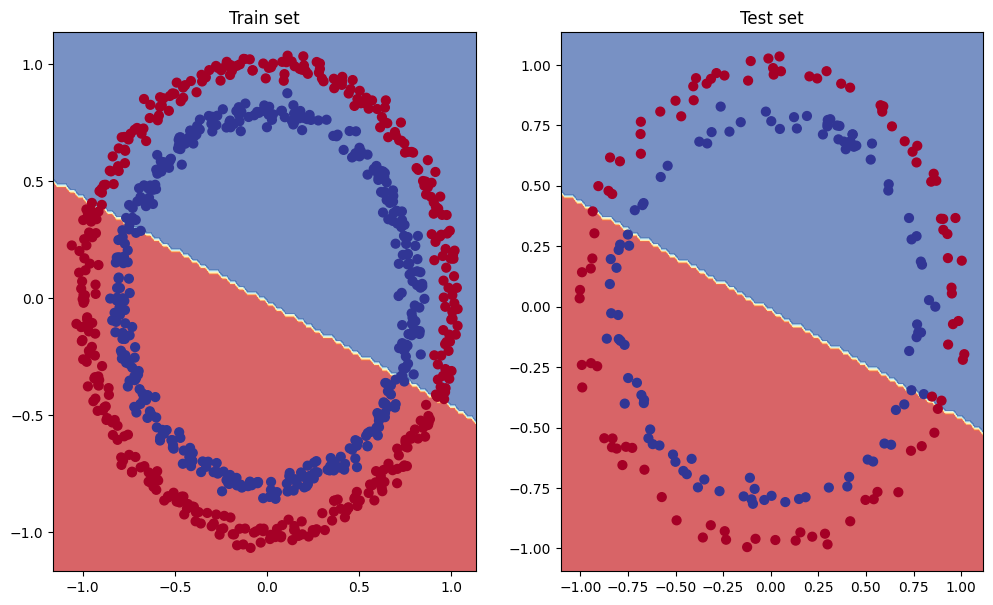

In [239]:
# Plot the decision boundary
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train set")
plot_decision_boundary(model=model, 
					   X=X_train,
					   y=y_train)
plt.subplot(1,2,2)
plt.title("Test set")
plot_decision_boundary(model=model, 
					   X=X_test,
					   y=y_test)

## 5. Imporving a model 

So as I say, since the model only contains one layer, it act like a linear function, create a line that try to seperate the dots so this will not work no matter how hard you train. 

More overall, you can try the following beside hint above, they are: 
* Add more layers - more node to learn about the patterns
* Add more hidden units
* Fit for longer 
* Changing activation function 
* Change the learning rate
* Change the loss function 

Ex: 
* From 5 -> 10 hidden units 
* From 2 -> 3 layers 
* From 100 -> 1000 epochs


In [247]:
# Can use sequential, but here I am practicing
class CircleClassificationV2(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer1 = nn.Linear(in_features=2, out_features= 10)
		self.layer2 = nn.Linear(in_features=10, out_features= 10)
		self.layer3 = nn.Linear(in_features=10, out_features= 1)

	def forward(self, input: torch.tensor):
		return self.layer3(self.layer2(self.layer1(input)))

model_v2 = CircleClassificationV2().to(device)

In [248]:
# Loss function 
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimzer = torch.optim.Adam(params=model_v2.parameters(), lr=0.001)


In [249]:
epochs = 1000

for epoch in range(epochs):
	model_v2.train()

	preds = model_v2(X_train)
	train_labels = torch.round(torch.sigmoid(preds))

	loss = loss_fn(preds, y_train)

	optimzer.zero_grad()

	loss.backward()

	optimzer.step()

	model_v2.eval()
	with torch.inference_mode():
		test_preds = model_v2(X_test)
		test_loss = loss_fn(test_preds, y_test)
		test_labels = torch.round(torch.sigmoid(test_preds))

		print(f"Epoch {epoch}: train_loss: {loss} | train_accuracy: {calculate_fn(train_labels, y_train)} | test_loss: {test_loss} | test_accuracy: {calculate_fn(test_labels, y_test)}")

Epoch 0: train_loss: 0.746114194393158 | train_accuracy: 50.0 | test_loss: 0.7449560165405273 | test_accuracy: 50.0
Epoch 1: train_loss: 0.7441862225532532 | train_accuracy: 50.0 | test_loss: 0.7430998086929321 | test_accuracy: 50.0
Epoch 2: train_loss: 0.7423071265220642 | train_accuracy: 50.0 | test_loss: 0.7412894368171692 | test_accuracy: 50.0
Epoch 3: train_loss: 0.7404773831367493 | train_accuracy: 50.0 | test_loss: 0.7395251393318176 | test_accuracy: 50.0
Epoch 4: train_loss: 0.7386969327926636 | train_accuracy: 50.0 | test_loss: 0.7378069758415222 | test_accuracy: 50.0
Epoch 5: train_loss: 0.7369659543037415 | train_accuracy: 50.0 | test_loss: 0.736134946346283 | test_accuracy: 50.0
Epoch 6: train_loss: 0.7352840900421143 | train_accuracy: 50.0 | test_loss: 0.7345088124275208 | test_accuracy: 50.0
Epoch 7: train_loss: 0.733651340007782 | train_accuracy: 50.0 | test_loss: 0.7329282164573669 | test_accuracy: 50.0
Epoch 8: train_loss: 0.7320671081542969 | train_accuracy: 50.0 | te

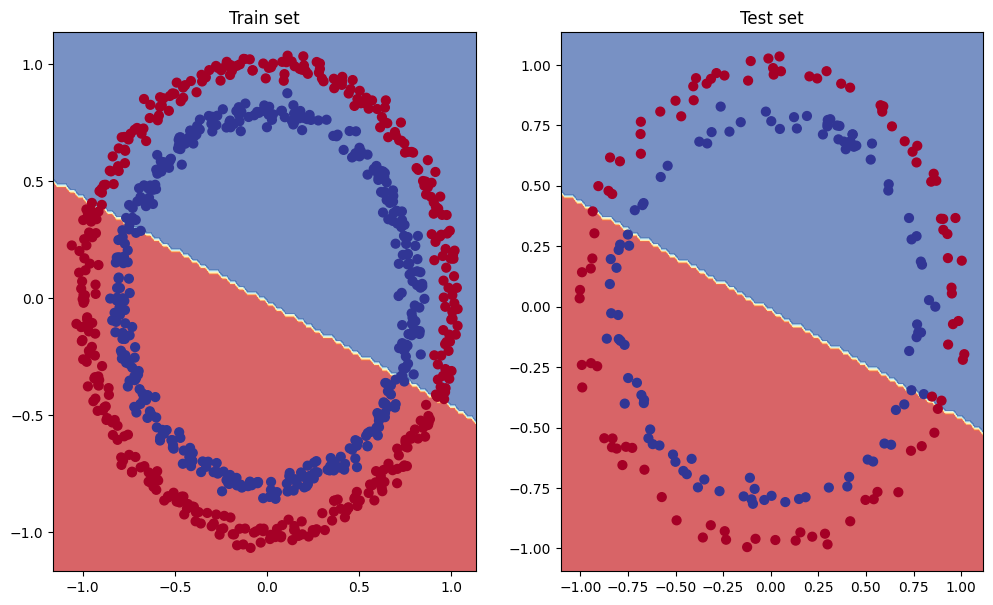

In [250]:
# Plot the decision boundary
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train set")
plot_decision_boundary(model=model_v2, 
					   X=X_train,
					   y=y_train)
plt.subplot(1,2,2)
plt.title("Test set")
plot_decision_boundary(model=model_v2, 
					   X=X_test,
					   y=y_test)

The result must appear the same, why ? 

The first layer have the out put A = X*W + B, without any activation function in between, pass A directly to the second layer will form just another linear function. 

So the question is, can this model learn something on the straight line ? 

In [260]:
# Just test it any way 
weight = 0.7 
bias = 0.3 

X = torch.arange(start=0, end=10, step=0.2)
X = X.unsqueeze(dim=1)

Y = X * weight + bias

train_split = 0.8
train_len = int(len(X) * train_split)
X_train = X[:train_len].to(device)
Y_train = Y[:train_len].to(device)

X_test = X[train_len:].to(device)
Y_test = Y[train_len:].to(device)

In [261]:
class testModel(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer1 = nn.Linear(in_features=1, out_features= 10)
		self.layer2 = nn.Linear(in_features=10, out_features= 10)
		self.layer3 = nn.Linear(in_features=10, out_features= 1)

	def forward(self, input: torch.tensor):
		return self.layer3(self.layer2(self.layer1(input)))

test_model = testModel().to(device)

In [270]:
# Loss function 
loss_fn = nn.L1Loss()

# Optimizer
optimzer = torch.optim.Adam(params=test_model.parameters(), lr=0.001)

In [ ]:
epochs = 1000

for epoch in range(epochs):
	test_model.train()

	preds = test_model(X_train)

	loss = loss_fn(preds, Y_train)

	optimzer.zero_grad()

	loss.backward()

	optimzer.step()

	test_model.eval()
	with torch.inference_mode():
		test_preds = test_model(X_test)
		test_loss = loss_fn(test_preds, Y_test)

		print(f"Epoch {epoch}: train_loss: {loss} | test_loss: {test_loss}")

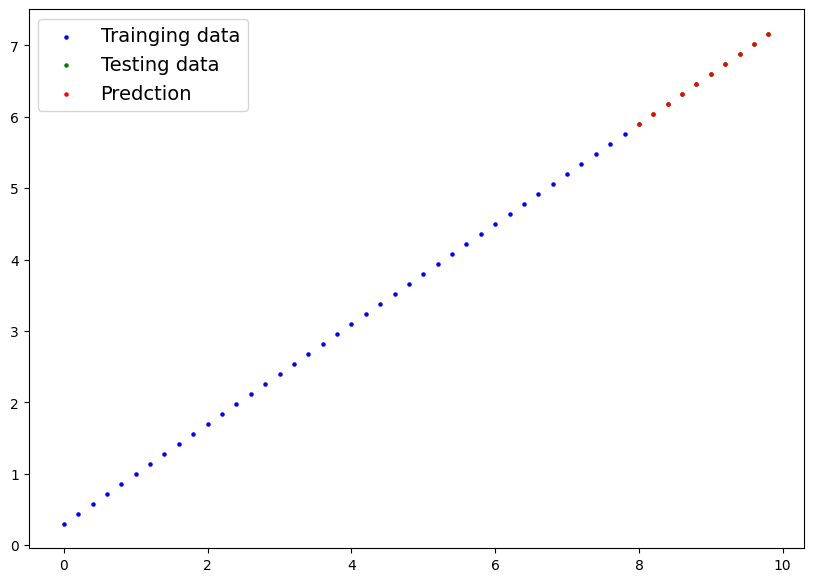

In [272]:
def plot_predictions(train_data = X_train, 
					 train_labels = Y_train,
					 test_data = X_test,
					 test_labels = Y_test, 
					 predictions=None):
	plt.figure(figsize=(10,7))
	
	plt.scatter(train_data.to("cpu"), train_labels.to("cpu"), c="b", s=5, label="Trainging data")
	
	plt.scatter(test_data.to("cpu"), test_labels.to("cpu"), c="g", s=5, label="Testing data")
	
	if predictions is not None: 
		plt.scatter(test_data.to("cpu"), predictions.to("cpu"), c="r", s=5, label="Predction")

	plt.legend(prop={"size": 14})

test_model.eval()
with torch.inference_mode():
	preds = test_model(X_test)
plot_predictions(predictions=preds)

So we can now confirm that the model is work well with linear data. 

So what is the problem here ? Are we missing some thing ? 

## 6. The missing piece: non-linearlity 

With infinite amount of straight and non-straight line, you can draw almost any object you want. So what we lack here is the non-linearlity aspect. 

### 6.1 Recreate the circle data

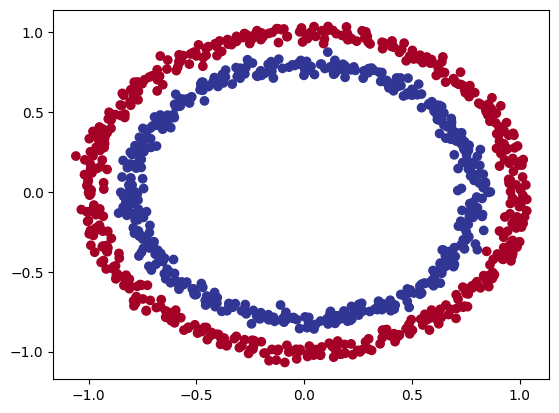

In [19]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000, 
					noise=0.03, 
					random_state=42)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)


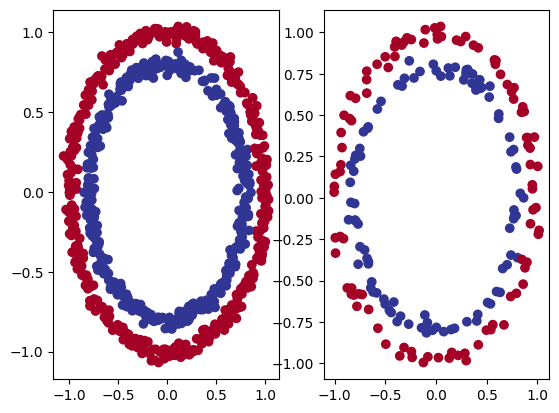

In [20]:
import torch 
from sklearn.model_selection import train_test_split

# Turn data into tensor 
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=42)

plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap = plt.cm.RdYlBu)
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap = plt.cm.RdYlBu)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.unsqueeze(dim=1).to(device)
y_test = y_test.unsqueeze(dim=1).to(device)

### 6.2 Buidl a model with non-linearlity

How so ? Add an activation function that non-linearlity, we will use ReLU, other function like sigmoid work too. 

But why ReLU, since the simplicity of ReLU derivate, it will help the training process more faster. 

In [21]:
# Can use sequential now we use it :) 
class CircleClassificationV3(nn.Module):
	def __init__(self):
		super().__init__()
		self.layers = nn.Sequential(nn.Linear(in_features=2, out_features= 10),
							  		nn.ReLU(),
									nn.Linear(in_features=10, out_features= 10),
									nn.ReLU(),
									nn.Linear(in_features=10, out_features= 1))
	def forward(self, input: torch.tensor):
		return self.layers(input)

model_v3 = CircleClassificationV3().to(device)

In [22]:
# Loss function 
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimzer = torch.optim.Adam(params=model_v3.parameters(), lr=0.001)

In [23]:
epochs = 1000

for epoch in range(epochs):
	model_v3.train()

	preds = model_v3(X_train)
	train_labels = torch.round(torch.sigmoid(preds))

	loss = loss_fn(preds, y_train)

	optimzer.zero_grad()

	loss.backward()

	optimzer.step()

	model_v3.eval()
	with torch.inference_mode():
		test_preds = model_v3(X_test)
		test_loss = loss_fn(test_preds, y_test)
		test_labels = torch.round(torch.sigmoid(test_preds))

		print(f"Epoch {epoch}: train_loss: {loss} | train_accuracy: {calculate_fn(train_labels, y_train)} | test_loss: {test_loss} | test_accuracy: {calculate_fn(test_labels, y_test)}")

Epoch 0: train_loss: 0.7016871571540833 | train_accuracy: 50.0 | test_loss: 0.6998338103294373 | test_accuracy: 50.0
Epoch 1: train_loss: 0.7011256217956543 | train_accuracy: 50.0 | test_loss: 0.6993675231933594 | test_accuracy: 50.0
Epoch 2: train_loss: 0.7005798816680908 | train_accuracy: 50.0 | test_loss: 0.6989169120788574 | test_accuracy: 50.0
Epoch 3: train_loss: 0.7000483274459839 | train_accuracy: 50.0 | test_loss: 0.6984795331954956 | test_accuracy: 50.0
Epoch 4: train_loss: 0.6995270848274231 | train_accuracy: 50.0 | test_loss: 0.6980559229850769 | test_accuracy: 50.0
Epoch 5: train_loss: 0.699016809463501 | train_accuracy: 50.0 | test_loss: 0.697641134262085 | test_accuracy: 50.0
Epoch 6: train_loss: 0.6985158920288086 | train_accuracy: 50.0 | test_loss: 0.6972417831420898 | test_accuracy: 50.0
Epoch 7: train_loss: 0.6980311274528503 | train_accuracy: 50.0 | test_loss: 0.6968637108802795 | test_accuracy: 50.0
Epoch 8: train_loss: 0.6975700259208679 | train_accuracy: 50.0 | t

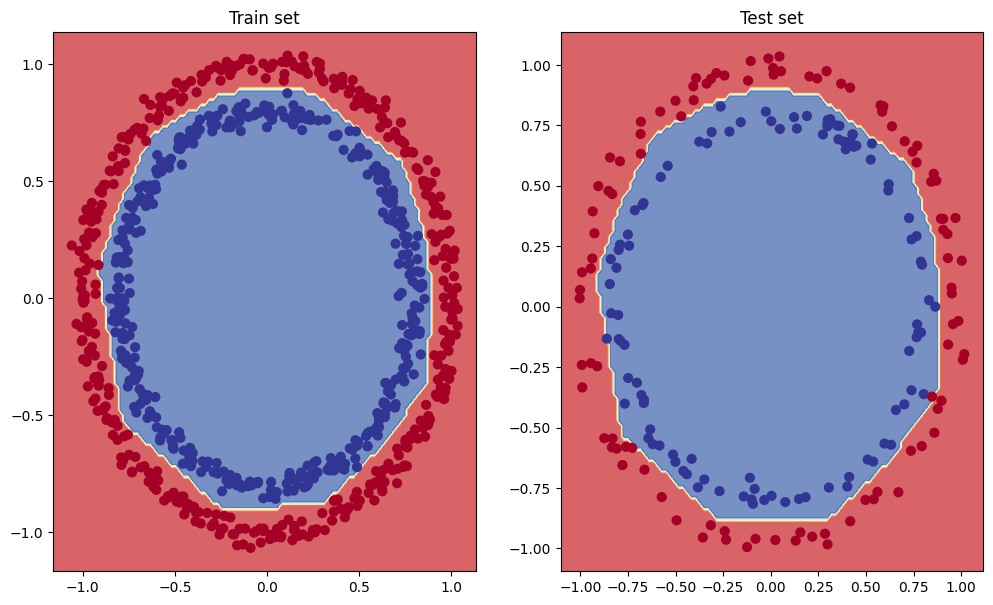

In [26]:
# Plot the decision boundary
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train set")
plot_decision_boundary(model=model_v3, 
					   X=X_train,
					   y=y_train)
plt.subplot(1,2,2)
plt.title("Test set")
plot_decision_boundary(model=model_v3, 
					   X=X_test,
					   y=y_test)

## 7. Now putting it all together along with multi-class classification problem. 

* Binary classification is 0 and 1. 

* Multiple class classification = more than one thing

The activation function and logit function for each of those has been briefly mentioned above, again all the related knowledge will not be repeat here. 

In [35]:
import torch 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Follow freeCodeCamp.org, I created some sample data from make_blobs
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 22

# Create multi-class dataset
X_blob, y_blob = make_blobs(n_samples=1000,
							n_features=NUM_FEATURES,
							centers=NUM_CLASSES,
							cluster_std=2.5,
							random_state=RANDOM_SEED)

# From numpy -> tensor 
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
																		y_blob,
																		test_size=0.3,
																		random_state=42)
X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)



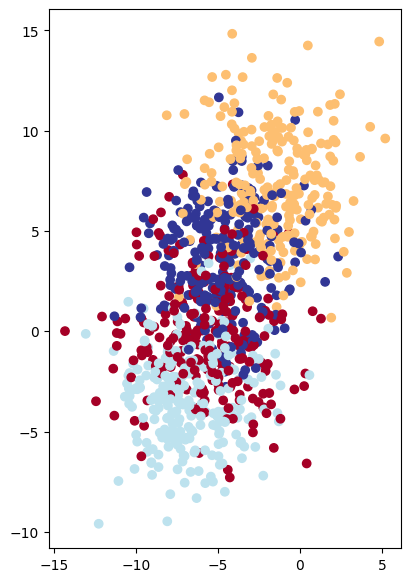

In [36]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap= plt.cm.RdYlBu);

### 7.1 Multi-class classification model 


In [37]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [38]:
class blobClassification(nn.Module):
	def __init__(self, input_features, output_features, hidden_unit = 10):
		super().__init__()
		self.layers = nn.Sequential(nn.Linear(in_features=input_features, out_features=hidden_unit),
							  	    nn.ReLU(),
									nn.Linear(in_features=hidden_unit, out_features=hidden_unit),
									nn.ReLU(),
									nn.Linear(in_features=hidden_unit, out_features=output_features))
	
	def forward(self, input: torch.tensor):
		return self.layers(input)

model = blobClassification(NUM_FEATURES, NUM_CLASSES).to(device)

model.eval()
with torch.inference_mode():
	preds = model(X_test)
	print(preds.shape)

torch.Size([200, 4])


### 7.2 Loss function and optimizer

In [39]:
# loss function will now using cross entropy
loss_fn = nn.CrossEntropyLoss()

# optimizer for gradient descent 
optimzer = torch.optim.Adam(params=model.parameters(), lr=0.001)

### 7.2 Training loop

In [40]:
def calculate_fn_class(y_true, y_pred):
	correct = torch.eq(y_true, y_pred).sum().item()
	return correct/len(y_pred) * 100

In [43]:
# Create a simple training loop
epochs = 2000

for epoch in range(epochs):
	model.train()

	preds = model(X_blob_train)

	preds_label = torch.softmax(preds, dim = 1).argmax(dim = 1)

	loss = loss_fn(preds, y_blob_train)

	optimzer.zero_grad()

	loss.backward()

	optimzer.step()

	model.eval()
	with torch.inference_mode(): 
		test_preds = model(X_blob_test)
		test_loss = loss_fn(test_preds, y_blob_test)
		test_label = torch.softmax(test_preds, dim = 1).argmax(dim = 1)

		if epoch % 10 == 0:	
			print(f"Epoch {epoch}: train_loss: {loss} | train_accuracy: {calculate_fn(preds_label, y_blob_train)} | test_loss: {test_loss} | test_accuracy: {calculate_fn(test_label, y_blob_test)}")

Epoch 0: train_loss: 0.6728971600532532 | train_accuracy: 67.85714285714286 | test_loss: 0.8679347634315491 | test_accuracy: 61.0
Epoch 10: train_loss: 0.6728553771972656 | train_accuracy: 67.85714285714286 | test_loss: 0.868282675743103 | test_accuracy: 61.33333333333333
Epoch 20: train_loss: 0.6728017330169678 | train_accuracy: 67.85714285714286 | test_loss: 0.8685124516487122 | test_accuracy: 61.0
Epoch 30: train_loss: 0.6727635264396667 | train_accuracy: 67.85714285714286 | test_loss: 0.8687031865119934 | test_accuracy: 61.33333333333333
Epoch 40: train_loss: 0.6727256178855896 | train_accuracy: 68.0 | test_loss: 0.8689072728157043 | test_accuracy: 60.66666666666667
Epoch 50: train_loss: 0.6726722121238708 | train_accuracy: 67.71428571428572 | test_loss: 0.8694642186164856 | test_accuracy: 60.333333333333336
Epoch 60: train_loss: 0.6726276278495789 | train_accuracy: 67.71428571428572 | test_loss: 0.8693835735321045 | test_accuracy: 61.0
Epoch 70: train_loss: 0.6725764870643616 | tr

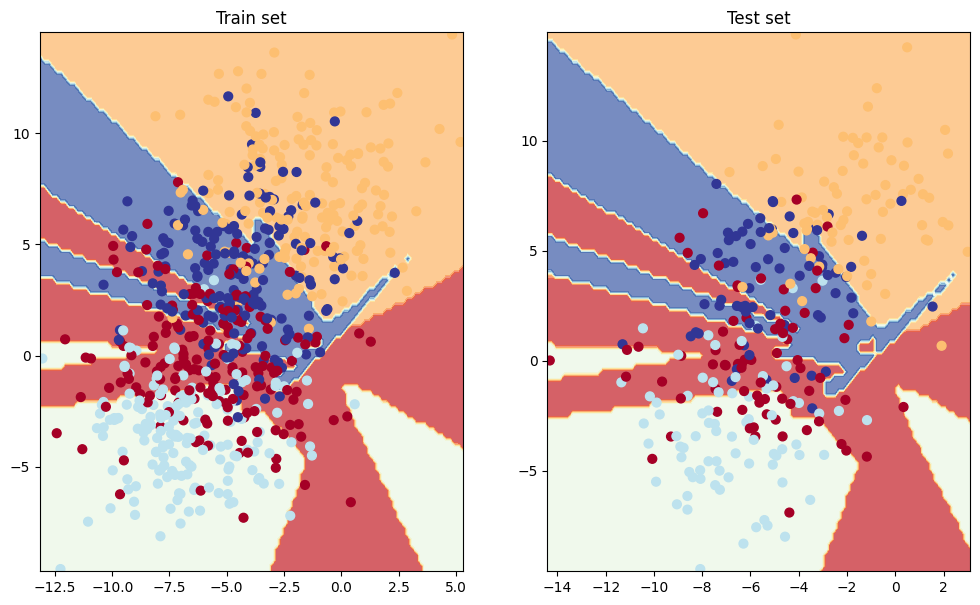

In [44]:
# Plot the decision boundary
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train set")
plot_decision_boundary(model=model, 
					   X=X_blob_train,
					   y=y_blob_train)
plt.subplot(1,2,2)
plt.title("Test set")
plot_decision_boundary(model=model, 
					   X=X_blob_test,
					   y=y_blob_test)